We selected 3 variables for Part 3, which are Household income (incomegroup), the total number of times per day eats fruits and vegetables (fruitvegtot), as well as Body Mass Index (bmi). We would like to use statistical methods with using Python to figure out the correlation between incomegroup and fruitvegtot, as well as bmi and fruitvegtot.

### *Linear Regression Result*
We used scatter plots and linear regression to determine the correlation between fruitvegtot and bmi with using the CCHS dataset.

In this study, R2 was 0.01. Roughly 1% of the variance found people’s BMI can be explained by the total number of times per day eats fruits and vegetables(fruitvegtot).
 
We can conclude that the two variables are weakly and negatively correlated with each other, that is, people who consume more fruits and vegetables have a lower BMI. Although R2  was relatively low, the result is fairly logical because we cannot infer the Body Mass Index from a single variable. BMI is linearly correlated with people's weight and the square of height. There definitely exist other factors that can influence people’s BMI, such as a person’s lifestyle and eating habits. Therefore, we can deduce that fruitvegtot can just slightly influence the BMI.
 
 
### *Seaborn bar chart*
We used bar chart to visualize the relationship between income group and total number of times per day eats fruits and vegetables. As shown in the graph, there's an increasing fruit and vegetable consumption times as people’s income increases. We can conclude that people with higher income tend to eat fruits and vegetables more frequently. 
 
 
### *Boxplot*
We decided to use Boxplot to see the distribution of the three variables. As seen in the chart, we not only easily recognize the median, interquartile range of the data of each variable, but also determine the outliers of the data. In our dataset,  all the 'income group' data are fall into the 5 levels of income, and thus the third boxplot does not show any outliers. In our case, it is meaningless to get rid of those outliers. Therefore, we just utilized boxplot to observe the data distribution within each variable.


In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from cchs import *
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

import seaborn as sns

In [24]:
data=pd.read_csv("CCHSX.csv")

In [25]:
data.head()

,alc_2,alwdwky,dhh_sex,dhhgage,edudr04,fvcdtot,gen_07,gen_09,gendhdi,gendmhi,gengswl,geogprv,hcu_1aa,hwtgbmi,hwtghtm,hwtgwtk,incghh,lbsghpw,sdcdfols,smkdsty
0,2,0,2,16,4,2.5,2,0,2,3,2,35,1,19.70,1.473,42.75,2,996,1,6
1,8,7,1,14,4,4.0,1,0,4,4,1,24,1,28.47,1.778,90.00,5,996,2,5
2,6,996,1,6,2,3.3,1,1,4,4,2,48,2,27.05,1.778,85.50,5,80,1,1
3,1,996,2,11,2,2.7,3,3,4,3,1,35,1,29.00,1.600,74.25,4,35,1,6
4,6,996,1,11,1,1.1,4,3,2,2,2,48,2,21.63,1.676,60.75,3,45,1,1


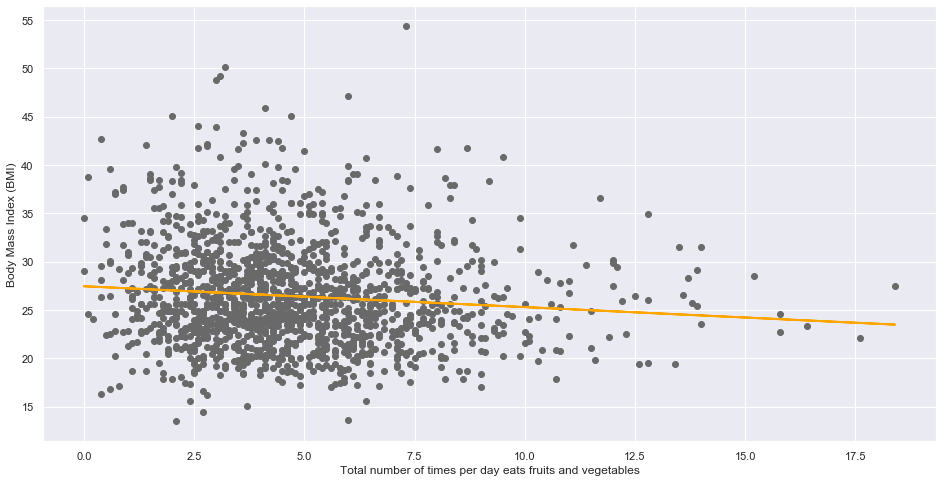

In [26]:
X = data['fvcdtot'].values.reshape(-1,1)
y = data['hwtgbmi'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['fvcdtot'],
    data['hwtgbmi'],
    c='dimgrey'
)
plt.plot(
    data['fvcdtot'],
    predictions,
    c='orange',
    linewidth=2
)
plt.xlabel("Total number of times per day eats fruits and vegetables")
plt.ylabel("Body Mass Index (BMI)")
plt.show()


In [27]:
X = data['fvcdtot']
y = data['hwtgbmi']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                hwtgbmi   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     15.35
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           9.32e-05
Time:                        19:26:46   Log-Likelihood:                -4635.4
No. Observations:                1500   AIC:                             9275.
Df Residuals:                    1498   BIC:                             9285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4504      0.295     93.126      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


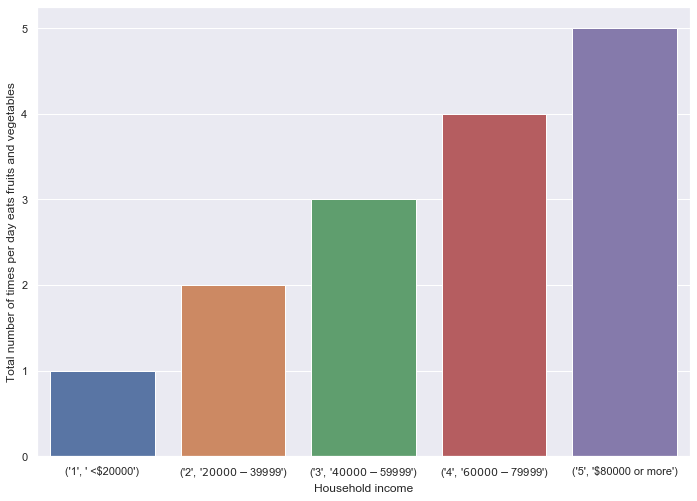

In [29]:
income_labels=[('1', ' <$20000'),
              ('2', '$20000-$39999'),
              ('3',  '$40000-$59999'),
              ('4',  '$60000-$79999'),
              ('5',  '$80000 or more')]

fake = pd.DataFrame({'incomegroup': income_labels, 'fruitvegtot': [1, 2, 3, 4, 5]})
ax = sns.barplot(x = 'incomegroup',
                 y = 'fruitvegtot', 
                 data = fake, 
                 )
ax.set(xlabel='Household income', ylabel='Total number of times per day eats fruits and vegetables')
plt.show()
sns.set(rc={'figure.figsize':(11.7,8.27)})

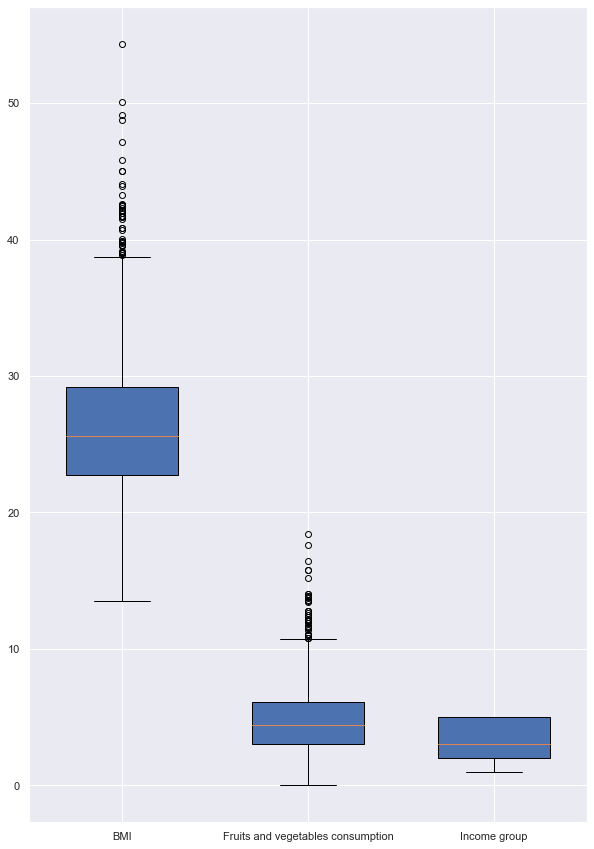

In [30]:
data_to_plot = [data['hwtgbmi'], data['fvcdtot'], data['incghh']]
fig = plt.figure(1, figsize=(10,15))
ax = fig.add_subplot(111)
            
labels='BMI','Fruits and vegetables consumption','Income group'

bp = ax.boxplot(data_to_plot,widths=0.6,patch_artist = True, labels=labels)